In [150]:
# make imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [151]:
# read datasets (disasters)
carbon_df = pd.read_csv('Data/carbon-emissions.csv')
disasters_df = pd.read_csv('Data/natural-disaster-data/number-of-natural-disaster-events.csv')
econ_df = pd.read_csv('Data/natural-disaster-data/economic-damage-from-natural-disasters.csv')

# Given a year is between 2000-2018, what is the chance that it's number of total disasters is greater than the average number of disasters for all years 1900-2018?

# Bayes' Theorem
## $ P(A|B) = \frac{P(A and B)}{P(A)} $

### In our scenario:

### $ P(A|B) $ = P(Year Has More Natural Disasters than the Mean for All Years 1900-2018, Given Year is 2000-2018)

### $ P(A) $ = P(Year is Between 2000-2018) 

## Getting a "Feel" For the Data

In [152]:
disasters_df.head()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


In [164]:
disasters_df['Entity'].unique()

array(['All natural disasters', 'Drought', 'Earthquake',
       'Extreme temperature', 'Extreme weather', 'Flood', 'Impact',
       'Landslide', 'Mass movement (dry)', 'Volcanic activity',
       'Wildfire'], dtype=object)

# What is the mean number of total natural disasters annually, for all years 1900-2018?

In [162]:
# find all rows reporting "all natural disasters"
COUNT = 'Number of reported natural disasters (reported disasters)'
all_disasters = disasters_df[disasters_df['Entity'] == 'All natural disasters'][COUNT]
# sum them together, divide by their number
mean_disasters = np.sum(all_disasters) / len(all_disasters)
# print the mean
mean_disasters

111.02521008403362

# How Many Years Between 1900-2018 Have More Than This Mean?

In [154]:
count = 0
for num in all_disasters:
    if num > mean_disasters:
        count += 1
count

42

# Do all years 2000-2018 have more total disasters than the mean?

In [155]:
all_disasters_years_and_counts = disasters_df[(disasters_df['Entity'] == 'All natural disasters')]
years_2000_2018 = all_disasters_years_and_counts.tail(19)
count = 0
for num in years_2000_2018['Number of reported natural disasters (reported disasters)']:
    if num > mean_disasters:
        count += 1
        
percent_val = round((count/19) * 100, 2)  
print(f'{percent_val}%')  # have all these years surpassed the mean we calculated?

100.0%


# So, What's the Chance that a Year has an Above Average Number of Natural Disasters, given the year is 2000-2018, than the mean of all 118 years?

In [156]:
print(f'{round((18/42) * 100, 2)}%')

42.86%


# Bayes' Theorem


# Given a year is between 2000-2018, what is the chance that it's number of total disasters is greater than the average number of disasters for all years 1900-2000?

In [157]:
# slice the DataFrame by century
disasters_20th = disasters_df[(disasters_df['Entity'] == 'All natural disasters') & (disasters_df['Year'] <= 1999) & (disasters_df['Year'] >= 1900)]
disasters_21st = disasters_df[(disasters_df['Entity'] == 'All natural disasters') & (disasters_df['Year'] >= 2000) & (disasters_df['Year'] <= 2018)]

# find the mean annual number of disasters in the 20th century
mean_20th = disasters_20th[COUNT].values.mean()

# compute the percent of years in the 21st century which is greater than this value
percent_over = len(disasters_21st[disasters_21st[COUNT] > mean_20th]) / len(disasters_21st) * 100
print(f'{percent_over}%')

100.0%


# So how does the probability we're looking for, differ from the one before?

In [161]:
# find the total number of years with counts above the mean_20th
count_above_mean = len(all_disasters[all_disasters > mean_20th])
print(f'{round((18/count_above_mean) * 100, 2)}%')

37.5%


# What is the distribution of natural disasters over the years 1900-1999? 2000-2018?

In [108]:
# let's take another look at that data
all_disasters_years_and_counts

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2
...,...,...,...,...
114,All natural disasters,NaN,2014,320
115,All natural disasters,NaN,2015,380
116,All natural disasters,NaN,2016,325
117,All natural disasters,NaN,2017,276


In [11]:
years = all_disasters_years_and_counts['Year']
COUNT = 'Number of reported natural disasters (reported disasters)'
counts = all_disasters_years_and_counts[COUNT]

y_c_data = pd.DataFrame(data={
                'years':years, 
                 'counts':counts})
y_c_data

,years,counts
0,1900,5
1,1901,2
2,1902,9
3,1903,8
4,1904,2
...,...,...
114,2014,320
115,2015,380
116,2016,325
117,2017,276


# Bar Plot of Natural Disasters By the Decade, 1900-2018

<BarContainer object of 119 artists>

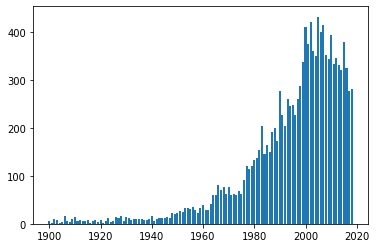

In [12]:
plt.bar(years, counts)

# What's the probability that any given natural disaster between 1900-2018, happened 1900-1999? 

In [13]:
def probability_for_interval(start_year, end_year):
    # take the sum of all natural disasters that occurred 1900-2018
    sum_all = y_c_data['counts'].sum()
    # take the sum that happen over the interval
    yrs_in_range = y_c_data[(y_c_data['years'] < end_year) & (y_c_data['years'] > start_year)]
    sum_yrs = yrs_in_range['counts'].sum()
    # return the probability
    percent = round((sum_yrs/sum_all) * 100, 2)
    return f'{percent}%'
    
print(probability_for_interval(1900, 2000))

48.12%


# What About 2000-2018?

In [14]:
print(probability_for_interval(2000, 2018))

46.59%


# Q3: Could We See Something Else if the Groups Weren't So Tiny?
## Stats By the Decade: Measures of Central Tendency

# How does the mean number of natural disasters change by the decade?

# Function to Compute Mean Amount of Disasters Annually, for a Given Decade

In [87]:
def grab_decade(start_yr, y_c_data, interval=10):
    '''Return years and counts for only a specific interval length.'''
    end_yr = int(start_yr) + interval - 1
    years = y_c_data[(y_c_data['years'] <= end_yr) & (y_c_data['years'] >= start_yr)]
    return years

def compute_decade_mean(start_yr, y_c_data):
    '''Sum the number of total disasters over a given period of 10 years, returns the mean.'''
    years = grab_decade(start_yr, y_c_data)
    # compute and return the mean
    return years['counts'].sum() / 10

# Function to Perform This Step for all Decades 1900-2010

In [88]:
def compute_means(y_c_data):
    '''Returns a dict of all mean number of disasters that occurred for every decade, 1900-2010.'''
    # compute the amount of decades in our data
    start_yr, end_yr = y_c_data['years'].min(), y_c_data['years'].max()
    decades = (end_yr - start_yr) // 10
    # store all the means in a dict
    decade_means = dict()
    for i in range(start_yr, end_yr, 10):
        decade_means[f'{i}'] = compute_decade_mean(i, y_c_data)
    return decade_means

means_by_decade = compute_means(y_c_data)

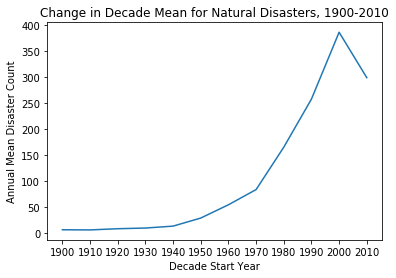

In [94]:
plt.plot(list(means_by_decade.keys()), list(means_by_decade.values()))
plt.xlabel('Decade Start Year')
plt.ylabel('Annual Mean Disaster Count')
plt.title('Change in Decade Mean for Natural Disasters, 1900-2010')
plt.show()

# How does the median number of natural disasters change by decade?¶

# Analogous Functions for the Medians By Decade

In [93]:
def compute_decade_median(start_yr, y_c_data):
    '''Return the median of total disasters over a given period of 10 years.'''
    years = grab_decade(start_yr, y_c_data)
    # compute and return the median
    return years['counts'].median()

def compute_medians(y_c_data):
    '''Returns a dict of all mean number of disasters that occurred for every decade, 1900-2010.'''
    # compute the amount of decades in our data
    start_yr, end_yr = y_c_data['years'].min(), y_c_data['years'].max()
    decades = (end_yr - start_yr) // 10
    # store all the medians in a dict
    decade_medians = dict()
    for i in range(start_yr, end_yr, 10):
        decade_medians[f'{i}'] = compute_decade_median(i, y_c_data)
    return decade_medians

medians_by_decade = compute_medians(y_c_data)

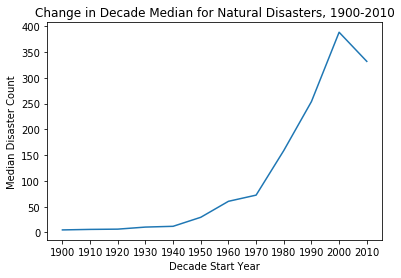

In [95]:
plt.plot(list(medians_by_decade.keys()), list(medians_by_decade.values()))
plt.xlabel('Decade Start Year')
plt.ylabel('Median Disaster Count')
plt.title('Change in Decade Median for Natural Disasters, 1900-2010')
plt.show()

# Wait, what? 

## Why the drop around 2000?

# Let's Look At IQR

## How do the counts of natural disasters compare to it?

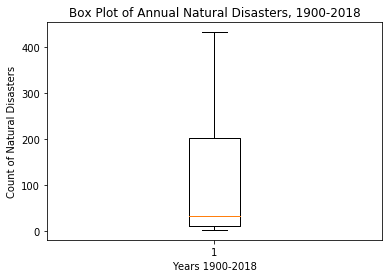

In [168]:
# show box plot
counts = all_disasters_years_and_counts['Number of reported natural disasters (reported disasters)']
plt.boxplot(counts)
plt.title("Box Plot of Annual Natural Disasters, 1900-2018")
plt.ylabel("Count of Natural Disasters")
plt.xlabel("Years 1900-2018")
plt.show()

# What exactly is the 75th percentile of disaster counts?

# Q6 Null Hypothesis: A greater average number of CO2 emissions from 2000-2018 is responsible from greater mean number of natural disasters annually from 2000-2018.

# Do we accept or reject this?

# Summary of Findings

# 1. Rising Above the Mean

## Years between 2000-2018 make up:

- nearly 43% of all years that have above average number of total natural disasters (1900-2018)
- 37.5% of those years that have above average number of total natural disasters, compared to the annual mean of the 20th century.
